# Лабораторная работа №2
## Выполнила студентка группы ДПИ22-2, Сирина Яна

### Задания для самостоятельной работы

Импортируем необходимые зависимости

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

In [1]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

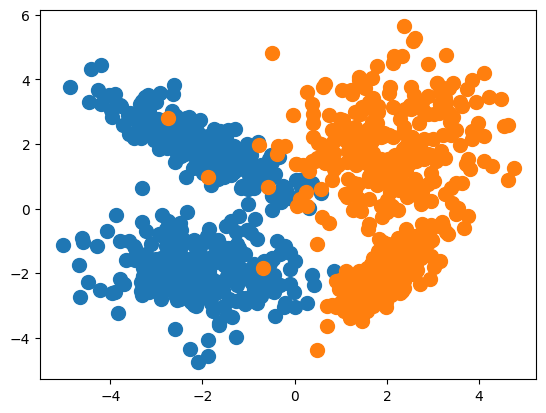

In [3]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], s=100)
plt.show()

In [9]:
class SGD:
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [10]:
class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [11]:
logreg = LogReg()
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [12]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [13]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

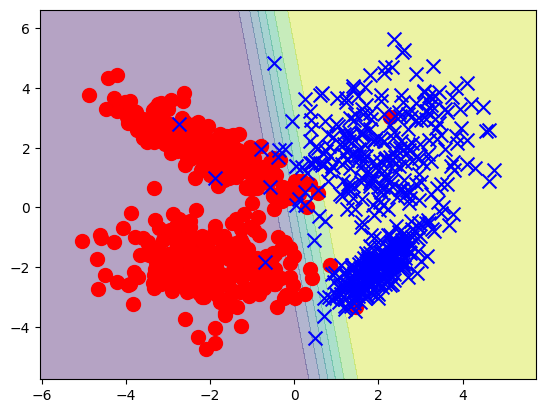

In [14]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

**1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.**

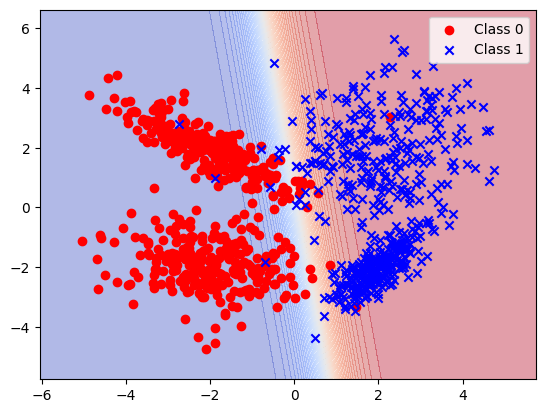

In [43]:
from sklearn.linear_model import LogisticRegression

# Генерация данных
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    class_sep=2,
    random_state=1
)

model = LogisticRegression()
model.fit(X, y)

# Визуализация
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Получение вероятностей
Z = model.predict_proba(grid_points)[:, 1].reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, levels=50, cmap='coolwarm')
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', label="Class 0")
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', label="Class 1")
plt.legend()
plt.show()


**2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.**

In [35]:
# Проверка расхождения при изменении параметра скорости обучения
for c in [1e-10, 1e-4, 1e-2, 0.1, 1, 10, 100]:
    model = LogisticRegression(C=c, solver='lbfgs', max_iter=100)
    try:
        model.fit(X, y)
        score = model.score(X, y)
        print(f"C = {c}: модель сошлась, accuracy = {score:.2f}")
    except Exception as e:
        print(f"C = {c}: модель не сошлась. Ошибка: {e}")

C = 1e-10: модель сошлась, accuracy = 0.50
C = 0.0001: модель сошлась, accuracy = 0.97
C = 0.01: модель сошлась, accuracy = 0.98
C = 0.1: модель сошлась, accuracy = 0.97
C = 1: модель сошлась, accuracy = 0.98
C = 10: модель сошлась, accuracy = 0.98
C = 100: модель сошлась, accuracy = 0.98


Если ошибка растет, это означает, что градиентный спуск расходится

**3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.**

In [36]:
# Модификация класса для добавления фиктивного столбца единиц
class LogRegImproved(SGD):
    def __init__(self, alpha=0.5, n_iters=1000):
        super().__init__(alpha=alpha, n_iters=n_iters)

    def add_bias(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.T.dot(self.sigmoid(X, b) - y)
        return grad

    def fit(self, X, y):
        X = self.add_bias(X)  # Добавляем столбец единиц
        super().fit(X, y)

    def predict_proba(self, X):
        X = self.add_bias(X)  # Добавляем столбец единиц
        return self.sigmoid(X, self.b)

    def predict(self, X):
        return self.predict_proba(X) > 0.5

# Пример использования
logreg_improved = LogRegImproved(alpha=0.5)
logreg_improved.fit(X, y)
y_pred = logreg_improved.predict(X)


**4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.**

Class_sep = 0.5: accuracy = 0.71


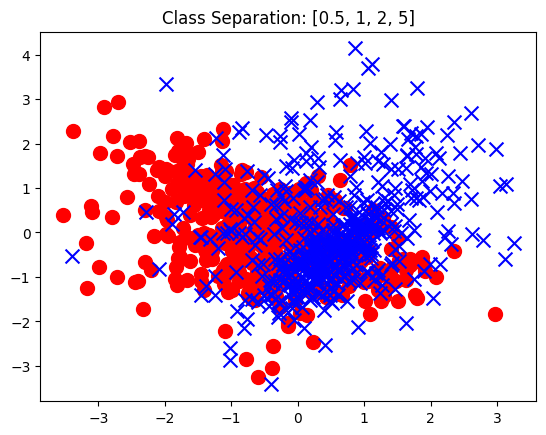

Class_sep = 1: accuracy = 0.85


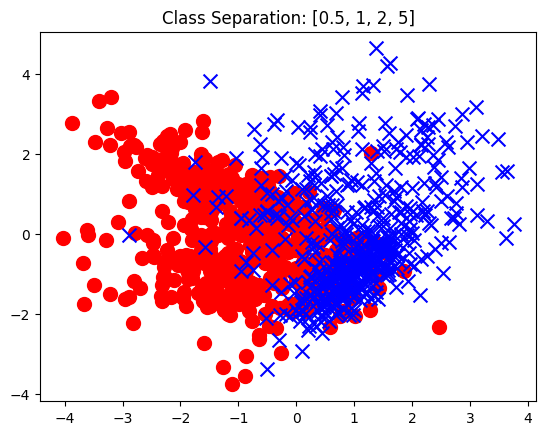

Class_sep = 2: accuracy = 0.98


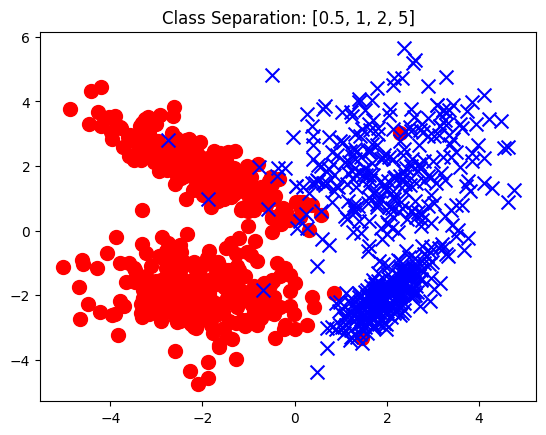

Class_sep = 5: accuracy = 1.00


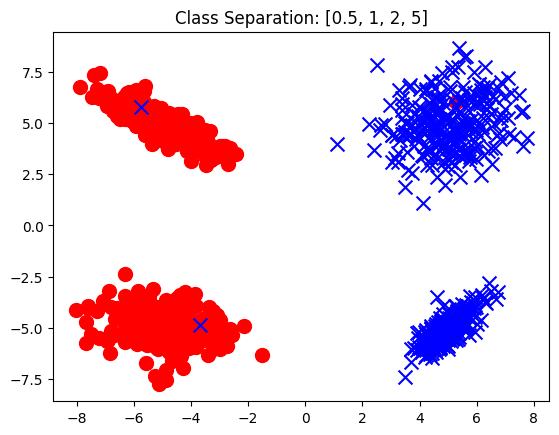

In [37]:
class_seps = [0.5, 1, 2, 5]
for sep in class_seps:
    X, y = make_classification(
        n_samples=1000,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        class_sep=sep,
        random_state=1
    )
    model = LogisticRegression()
    model.fit(X, y)
    score = model.score(X, y)
    print(f"Class_sep = {sep}: accuracy = {score:.2f}")
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', s=100)
    plt.title(f"Class Separation: {class_seps}")
    plt.show()

При большем class_sep модель работает точнее.

**5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.**

Accuracy = 0.94


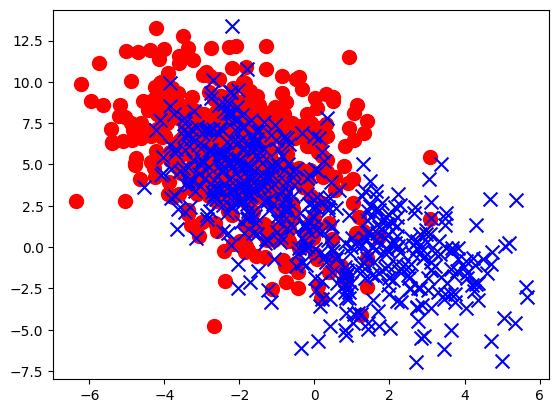

In [38]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,  # Увеличиваем число признаков
    n_informative=8,
    n_redundant=2,
    n_classes=2,
    class_sep=2,
    random_state=1
)

# Создание и обучение модели
model = LogisticRegression()
model.fit(X, y)
print(f"Accuracy = {model.score(X, y):.2f}")
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', s=100)
plt.show()

Мы увеличиваем число признаков и убеждаемся, что алгоритм универсален.

**6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.**

Accuracy = 0.73


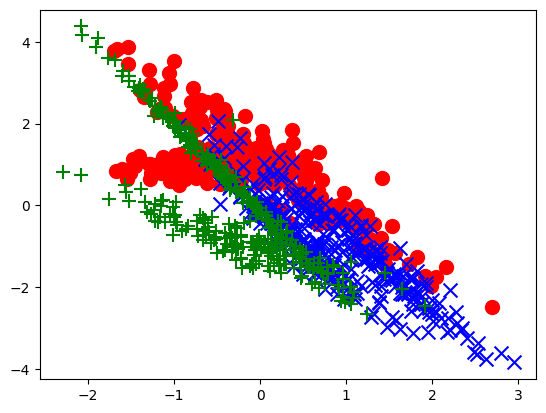

In [41]:
from sklearn.multiclass import OneVsRestClassifier
X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    n_redundant=1,
    n_classes=3,  # Увеличиваем число классов
    random_state=1
)

# Создание и обучение модели
model = LogisticRegression(solver='lbfgs', max_iter=500)
OneVsRestClassifier(model.fit(X, y))
print(f"Accuracy = {model.score(X, y):.2f}")
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', s=100)
plt.scatter(X[:, 0][y == 2], X[:, 1][y == 2], marker="+", c='g', s=100)
plt.show()

**7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression**

In [42]:
y_proba = model.predict_proba(X)
print("Пример вероятностей для первых 5 объектов:")
print(y_proba[:5])

Пример вероятностей для первых 5 объектов:
[[0.04595989 0.16876299 0.78527712]
 [0.52814227 0.03373349 0.43812424]
 [0.94198952 0.0477715  0.01023898]
 [0.8853382  0.04629311 0.06836868]
 [0.28020958 0.65612935 0.06366107]]


**Контрольные вопросы**

1. Сформулируйте, в чем состоит задача классификации, придумайте несколько примеров.

  Задача классификации состоит в разделении объектов на несколько классов на основе их характеристик.
Примеры:

  * Определение, является ли письмо спамом.
  * Классификация изображений по категориям (например, "кошка" или "собака").
  * Диагностика болезней на основе симптомов.


2. Что такое шаг градиентного спуска?

  Шаг градиентного спуска это величина, на которую обновляются параметры модели на каждом шаге алгоритма обучения. Регулируется параметром скорости обучения

3. Какая функция используется в качестве функции ошибки в модели логистической регрессии?

  Bспользуется логарифмическая функция потерь (log-loss). Она измеряет разницу между предсказанными вероятностями и истинными метками классов.

4. Зачем при реализации логистической регрессии к матрице признаков добавлялся столбец из единиц?

  Столбец единиц добавляется, чтобы учесть смещение в модели. Это позволяет модели логистической регрессии корректно учитывать случаи, когда разделяющая гиперплоскость не проходит через начало координат.